In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)

latexify()

df = pd.read_csv("strobes.csv", index_col=["sizes"])

/home/sieben/.local/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


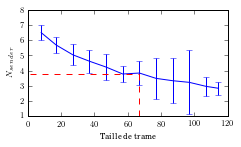

In [46]:

fig = plt.figure()

ax = df["mean"].plot(yerr=df.avg)
ax.set_xlim((0, 120))
ax.set_ylabel("$N_{sender}$")
ax.set_xlabel("Taille de trame")
fig.tight_layout()
fig.savefig("new_average_strobing.pdf")

ax.plot([67, 67], [1, 3.76], 'r--')
ax.plot([1, 67], [3.76, 3.76], 'r--')
fig.savefig("new_average_strobing_hl.pdf")

,avg,mean
sizes,,
8,0.499997,6.501672
17,0.523540,5.684058
27,0.690709,5.037634
37,0.759478,4.613208
47,0.853003,4.226994
57,0.504418,3.769231
67,0.799305,3.833333
77,1.329897,3.481013
87,1.470738,3.326241
